In [1]:
import numpy as np
import pandas as pd

In [2]:
#error form after reading the spam.csv file directly beacause of that we are using exception handling method
filename = 'spam.csv'

try:
    with open(filename, 'r', encoding='utf-8') as f:
        df = pd.read_csv(f)
        
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Trying to decode with 'latin-1' codec...")
    
    with open(filename, 'r', encoding='latin-1') as f:
        df = pd.read_csv(f)

df.head()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte
Trying to decode with 'latin-1' codec...


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1.Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#we can remove last 3 column ,there is no need of that column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Target']=encoder.fit_transform(df['Target'])

In [9]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

# 2.EDA

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

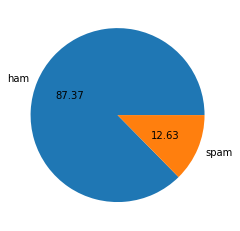

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
#data is unbalanced

In [17]:
#for advanced EDA we can use, here we are creating 3 new columns based on number of characters,words, sentences
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
#visualize using histogram 
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

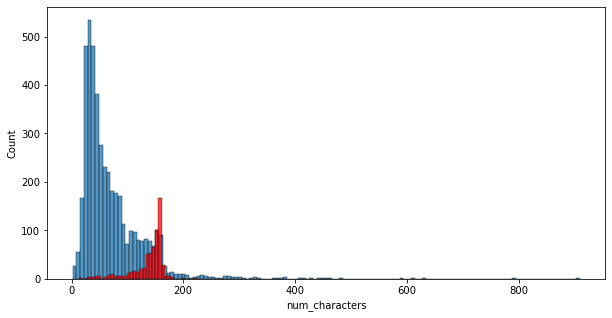

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

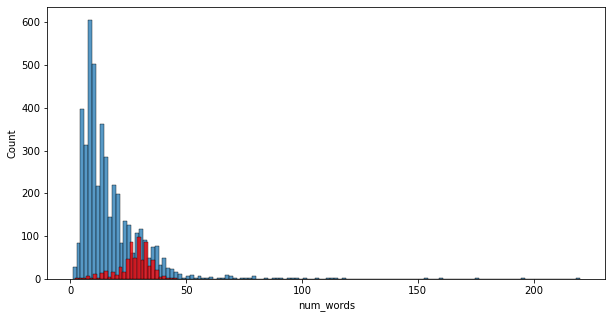

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

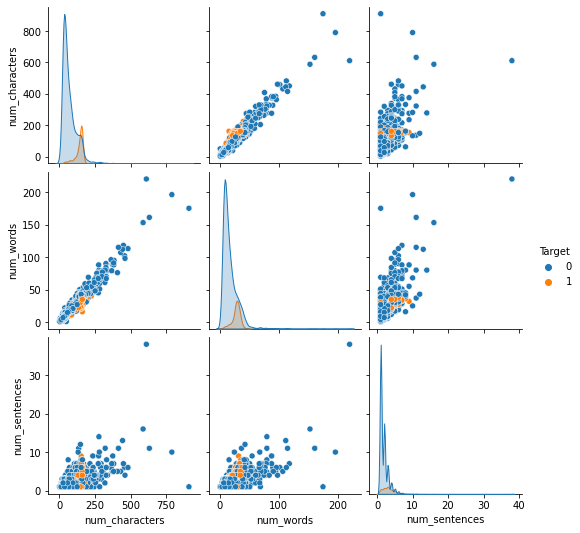

In [27]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

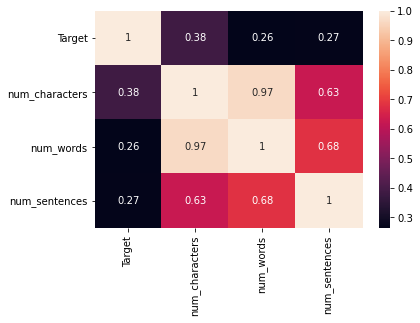

In [28]:
sns.heatmap(df.corr(),annot=True)

# 3.Data preprocessing

In [29]:
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming
#we are going to do all this , we make a function to do all this processess

In [30]:
#stop words in english
nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords.words('english')  #remove the #  symbol if you want to show stopwords in english

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#we are checking punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [33]:
def transform_text(text):
    text=text.lower()
    
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if(i not in string.punctuation and i not in stopwords.words('english')):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [34]:
transform_text('I am Fahad  is a good guy?? ! ! loved processing a cartoons')

'fahad good guy love process cartoon'

In [35]:
transform_text(df['Text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:
df['transformed_text']=df['Text'].apply(transform_text)

In [37]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
#based on the new column transformed_text we'll get the spam words
#for showing that we are using word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,background_color='white',min_font_size=10)

In [39]:
#making spam word cloud
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))

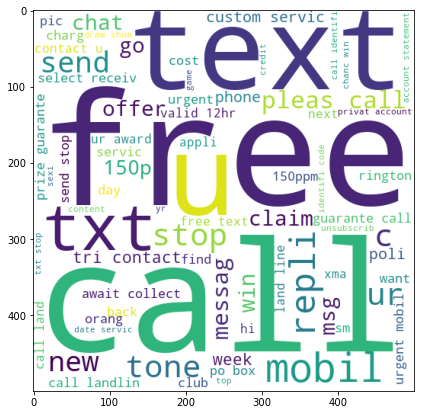

In [40]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

In [41]:
#for ham messages
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))

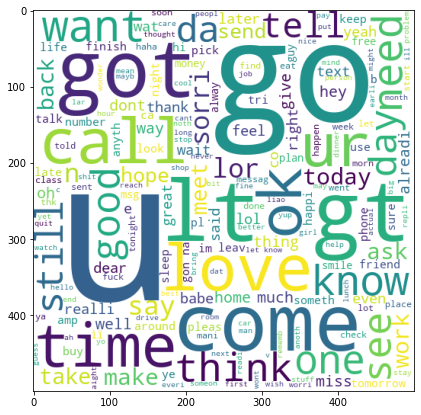

In [42]:
plt.figure(figsize=(12,7))
plt.imshow(ham_wc)

In [43]:
#we need to find most 15 spam  and ham words
spam_words=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split(' '):
        spam_words.append(word)

In [44]:
len(spam_words)

9939

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


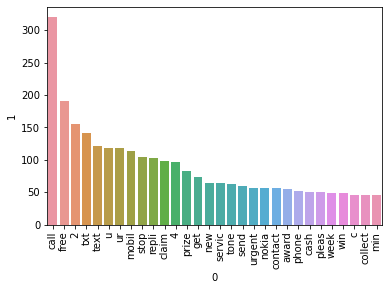

In [45]:
#we are making new dataframe which contain spam  or ham word and it's freequency
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_words=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split(' '):
        ham_words.append(word)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


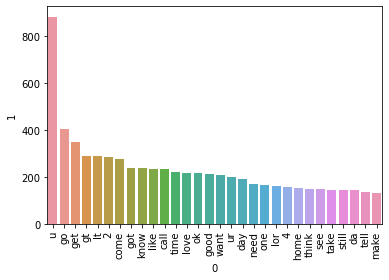

In [47]:
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
len(ham_words)

35411

# 4.Model building

In [122]:
df.head()         #from this dataset transformed_text is our input and output is target

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [123]:
#input is catogorical value we can change it to vector through vectorization, 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidv=TfidfVectorizer(max_features=3000)
# we can use any one of this vectorization ,try to check which give more accuracy and all

In [124]:
#x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidv.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [125]:
y=df['Target']
y.shape

(5169,)

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [129]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[773 121]
 [ 19 121]]
0.5


In [130]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[894   0]
 [ 32 108]]
1.0


In [131]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   1]
 [ 19 121]]
0.9918032786885246


In [132]:
#using Tfid vectorization  multinomailNB is a good model 

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [135]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [136]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [137]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9738878143133463, 0.9829059829059829)

In [138]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9829059829059829
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8288288288288288
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9795918367346939
For  RF
Accuracy -  0.9661508704061895
Precision -  1.0
For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.9203539823008849
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.926829268292683
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.991304347826087
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9886363636363636


In [139]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [140]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.969052,1.000000
5,RF,0.966151,1.000000
8,ETC,0.973888,0.991304
9,GBDT,0.947776,0.988636
0,SVC,0.973888,0.982906
4,LR,0.955513,0.979592
7,BgC,0.966151,0.926829
6,AdaBoost,0.956480,0.920354
3,DT,0.935203,0.828829


#all the steps after this is i'm are trying for getting good result

In [68]:
#model improvement
#in model improvement we are trying add some parameters , and check each one which give more performance

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.971954,1.000000,0.973888,0.982906
1,KN,0.894584,1.000000,0.908124,1.000000
2,NB,0.955513,1.000000,0.969052,1.000000
3,RF,0.964217,1.000000,0.966151,1.000000
4,ETC,0.970019,0.990991,0.973888,0.991304
5,GBDT,0.949710,0.988889,0.947776,0.988636
6,LR,0.953578,0.979167,0.955513,0.979592
7,AdaBoost,0.957447,0.952830,0.956480,0.920354
8,BgC,0.969052,0.942623,0.966151,0.926829
9,DT,0.934236,0.875000,0.934236,0.827273


In [89]:
# above dataframe is giving which model performes well 
#now we use another way to improve model use scaling
#after running this need to run all the above code from modeling , bcz here we change the tfidv feature lenght

In [88]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [104]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [106]:
#new_df_scaled=new_df.merge(temp_df,on='Algorithm')
#new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.971954,1.000000,0.973888,0.982906,0.968085,0.934959
1,KN,0.894584,1.000000,0.908124,1.000000,0.899420,1.000000
2,NB,0.955513,1.000000,0.969052,1.000000,0.982592,0.976562
3,RF,0.964217,1.000000,0.966151,1.000000,0.966151,1.000000
4,ETC,0.970019,0.990991,0.973888,0.991304,0.973888,0.991304
5,GBDT,0.949710,0.988889,0.947776,0.988636,0.947776,0.988636
6,LR,0.953578,0.979167,0.955513,0.979592,0.956480,0.970297
7,AdaBoost,0.957447,0.952830,0.956480,0.920354,0.956480,0.920354
8,BgC,0.969052,0.942623,0.966151,0.926829,0.966151,0.926829
9,DT,0.934236,0.875000,0.934236,0.827273,0.934236,0.827273


In [107]:
#we try in many way to improve our model like fix max fit  and do scaling , but from all this we get the point model shows best only in we fix max_fit 3000

In [119]:
#now we are making voting classifier , for getting best combination of our best models
# we know based on above improving operation only svc,nb,rfc are showing best results

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [116]:
voting=VotingClassifier(estimators=[('svc',svc),('nb',mnb),('rfc',rfc)],voting='hard')

In [117]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [118]:
y_predi=voting.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_predi))
print('presision:',precision_score(y_test,y_predi))

accuracy: 0.9777562862669246
presision: 0.9915966386554622


In [121]:
# Applying stacking
from sklearn.ensemble import StackingClassifier

estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.984375


In [ ]:
#we tried voting method, and stacking also but we didn't get good performance,only neive bayes is showing good result 